In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [78]:
path = r'C:\Users\bdfba\OneDrive\Desktop\PROJET BEA #\privé.csv'
df = pd.read_csv(path, skiprows=8, encoding='latin1', on_bad_lines='skip')
df.columns = [c.strip() for c in df.columns]
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
print(df.columns)

Index(['agence', 'SECTEUR', 'DATE D'ENTREE AU CHAPITRE', 'Code Client',
       'N° de Compte', 'Intitulé', 'Créances Exigibles en Recouvrement (1)',
       'A problèmes potentiels      (20 %)', 'Très risquées   (50%)',
       'Compromises (100%)', 'TOTAL CREANCES DOUTEUSES   (2)', 'Total (1)+(2)',
       'Créances Contentieuses',
       'Observations sur l'Origne de l'Impayé et les Actions Entreprises'],
      dtype='object')


In [79]:
df.columns = [c.strip() for c in df.columns]


def clean_currency(value):
    if pd.isna(value): return 0.0
    if isinstance(value, (int, float)): return float(value)
    value = str(value).replace('\xa0', '').replace(' ', '').replace(',', '').strip()
    if value in ['-', '', '.']: return 0.0
    try:
        return float(value)
    except:
        return 0.0

money_cols = ['Total (1)+(2)', 'Créances Contentieuses', 'Compromises (100%)', 'Très risquées\xa0  (50%)','A problèmes potentiels      (20 %)']
for col in money_cols:
    if col in df.columns:
        df[col] = df[col].apply(clean_currency)

df["DATE D'ENTREE AU CHAPITRE"] = pd.to_datetime(df["DATE D'ENTREE AU CHAPITRE"], errors='coerce', dayfirst=True)






In [80]:

missing_values = df.isnull().sum()

print("Nombre de valeurs manquantes par colonne :")
print(missing_values)

Nombre de valeurs manquantes par colonne :
agence                                                                15
SECTEUR                                                               30
DATE D'ENTREE AU CHAPITRE                                            420
Code Client                                                           55
N° de Compte                                                          68
Intitulé                                                              63
Créances Exigibles en Recouvrement (1)                              1777
A problèmes potentiels      (20 %)                                     0
Très risquées   (50%)                                                  0
Compromises (100%)                                                     0
TOTAL CREANCES DOUTEUSES   (2)                                        22
Total (1)+(2)                                                          0
Créances Contentieuses                                                 0
Observat

In [81]:

df['SECTEUR'] = df['SECTEUR'].astype(str).str.strip().str.upper()
df['Intitulé'] = df['Intitulé'].astype(str).str.strip().str.upper()

all_numeric_cols = [
    'Créances Exigibles en Recouvrement (1)',
    'A problèmes potentiels      (20 %)',
    'Très risquées\xa0  (50%)',
    'Compromises (100%)',
    'TOTAL CREANCES DOUTEUSES   (2)',
    'Total (1)+(2)',
    'Créances Contentieuses'
]

for col in all_numeric_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0.0)

obs_col = "Observations sur l'Origne de l'Impayé et les Actions Entreprises"
df[obs_col] = df[obs_col].fillna("NON SPECIFIE")

df = df[df['agence'].notna()] 
df = df[~df['SECTEUR'].str.contains('TOTAL', na=False)] 

df['SECTEUR'] = df['SECTEUR'].replace('NESDA EX ANSEJ', 'ANSEJ')


print("Secteurs après unification :")
print(df['SECTEUR'].unique())





Secteurs après unification :
['PRIVÉ' 'ANSEJ' 'CNAC' 'ANGEM' 'IMMOBILIER' 'CAC' 'OUSRATIC' 'CAV' 'NAN'
 'NESDA' 'PRIVE' 'T  O  T   A   L']


In [82]:

replacements = {
    'PRIVE': 'PRIVÉ',             
    'NESDA EX ANSEJ': 'ANSEJ',    
}
df['SECTEUR'] = df['SECTEUR'].replace(replacements)

# On utilise une expression régulière (regex) pour supprimer TOTAL même s'il y a des espaces
df = df[~df['SECTEUR'].str.contains('T\s*O\s*T\s*A\s*L', na=False, regex=True)]

df = df[df['SECTEUR'] != 'NAN']


<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\bdfba\AppData\Local\Temp\ipykernel_23764\724689343.py:8: SyntaxWarning: invalid escape sequence '\s'
  df = df[~df['SECTEUR'].str.contains('T\s*O\s*T\s*A\s*L', na=False, regex=True)]


In [83]:
print("Secteurs après unification :")
print(df['SECTEUR'].unique())


Secteurs après unification :
['PRIVÉ' 'ANSEJ' 'CNAC' 'ANGEM' 'IMMOBILIER' 'CAC' 'OUSRATIC' 'CAV'
 'NESDA']


In [84]:

missing_values = df.isnull().sum()

print("Nombre de valeurs manquantes par colonne :")
print(missing_values)


Nombre de valeurs manquantes par colonne :
agence                                                                0
SECTEUR                                                               0
DATE D'ENTREE AU CHAPITRE                                           357
Code Client                                                           0
N° de Compte                                                          5
Intitulé                                                              0
Créances Exigibles en Recouvrement (1)                                0
A problèmes potentiels      (20 %)                                    0
Très risquées   (50%)                                                 0
Compromises (100%)                                                    0
TOTAL CREANCES DOUTEUSES   (2)                                        0
Total (1)+(2)                                                         0
Créances Contentieuses                                                0
Observations sur l'Or

In [85]:

import string
tous_les_clients = df['Intitulé'].unique()
mapping_clients = {nom: f"Client {i+1}" for i, nom in enumerate(tous_les_clients)}
df['Intitulé'] = df['Intitulé'].map(mapping_clients)


toutes_les_agences = sorted(df['agence'].unique())
mapping_agences = {ag: f"Agence {string.ascii_uppercase[i % 26]}" for i, ag in enumerate(toutes_les_agences)}
df['agence'] = df['agence'].map(mapping_agences)


In [86]:
print(df.head(10))  # Les 10 premières lignes
print(df.tail(10))  # Les 10 dernières lignes

     agence SECTEUR DATE D'ENTREE AU CHAPITRE      Code Client  \
0  Agence A   PRIVÉ                2014-12-31  070033049916000   
1  Agence A   PRIVÉ                2014-12-31  257490227016000   
2  Agence A   PRIVÉ                2014-12-31  725203338916000   
3  Agence A   PRIVÉ                2014-12-31  897630248829000   
4  Agence A   PRIVÉ                2014-12-31  923640108409000   
5  Agence A   PRIVÉ                2014-12-31  018413459016000   
6  Agence A   PRIVÉ                2014-12-31  420451479947000   
7  Agence A   PRIVÉ                2019-08-01  002093330416000   
8  Agence A   PRIVÉ                2017-12-21  719881320216000   
9  Agence A   PRIVÉ                2013-01-10  203783159216000   

     N° de Compte   Intitulé Créances Exigibles en Recouvrement (1)  \
0  1000790258-80    Client 1                                   0.00   
1   1000600924-50   Client 2                                   0.00   
2   1000790188-96   Client 3                                

In [87]:
# Remplacer les numéros de compte manquants par 'NON RENSEIGNÉ'
df['N° de Compte'] = df['N° de Compte'].fillna('INCONNU')


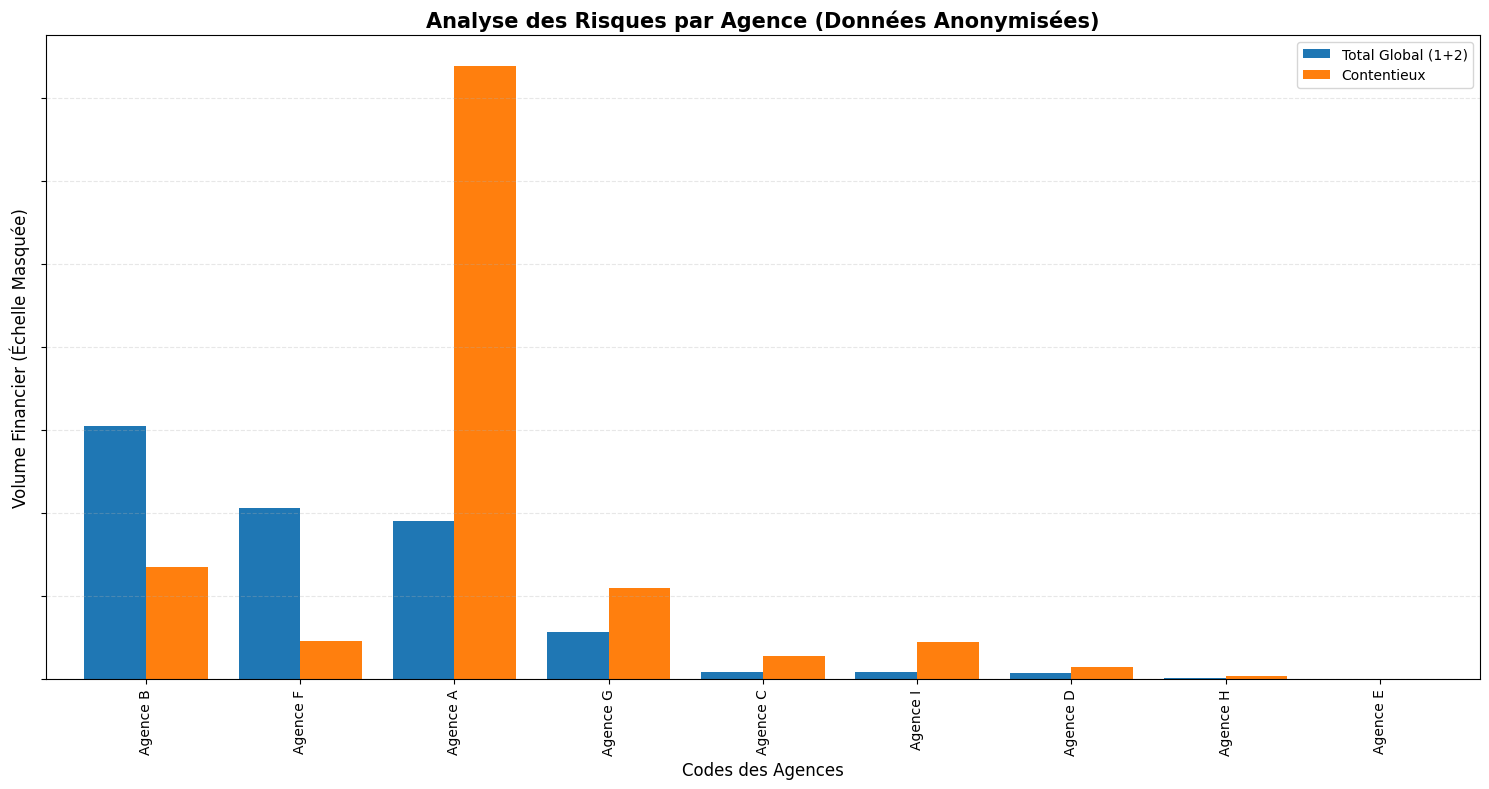

--- CLASSEMENT DES AGENCES (SANS MONTANTS) ---
['Agence B', 'Agence F', 'Agence A', 'Agence G', 'Agence C', 'Agence I', 'Agence D', 'Agence H', 'Agence E']


In [88]:

pd.options.display.float_format = '{:,.2f}'.format
df.columns = df.columns.str.strip()

cols = [ 
    'Total (1)+(2)', 
    'Créances Contentieuses'
]

df_agence_tri = df.groupby('agence')[cols].sum()
df_agence_tri = df_agence_tri.sort_values(by='Total (1)+(2)', ascending=False)

ax = df_agence_tri.plot(kind='bar', figsize=(15, 8), width=0.8)

plt.title('Analyse des Risques par Agence (Données Anonymisées)', fontsize=15, fontweight='bold')
plt.xlabel('Codes des Agences', fontsize=12)

plt.ylabel('Volume Financier (Échelle Masquée)', fontsize=12)


ax.set_yticklabels([]) 

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(['Total Global (1+2)', 'Contentieux'])

plt.tight_layout()
plt.show()

print("--- CLASSEMENT DES AGENCES (SANS MONTANTS) ---")
print(df_agence_tri.index.tolist())


Situation Globale : Le graphique révèle un déséquilibre critique dans la gestion du risque au sein du réseau d'agences.

     Le Problème Majeur (Agence A) : Cette agence est en situation d'alerte rouge. Son volume de contentieux (impayés/litiges) est démesuré et dépasse son activité saine. Elle concentre la majorité du risque financier du réseau.

     Le Modèle à Suivre (Agence F) : C'est la meilleure élève. Elle génère un fort volume d'affaires (barre bleue élevée) tout en maintenant un risque très faible. Sa méthode de sélection des dossiers est excellente.

     Les Signaux Faibles (Agences G, C, I) : Bien que petites, ces agences ont des ratios malsains : elles ont plus de contentieux que d'activité réelle.

Conclusion & Action : La priorité absolue est de lancer un audit sur l'Agence A pour stopper l'hémorragie et focaliser les efforts sur le recouvrement, tout en s'inspirant des méthodes de travail de l'Agence F pour former les autres.

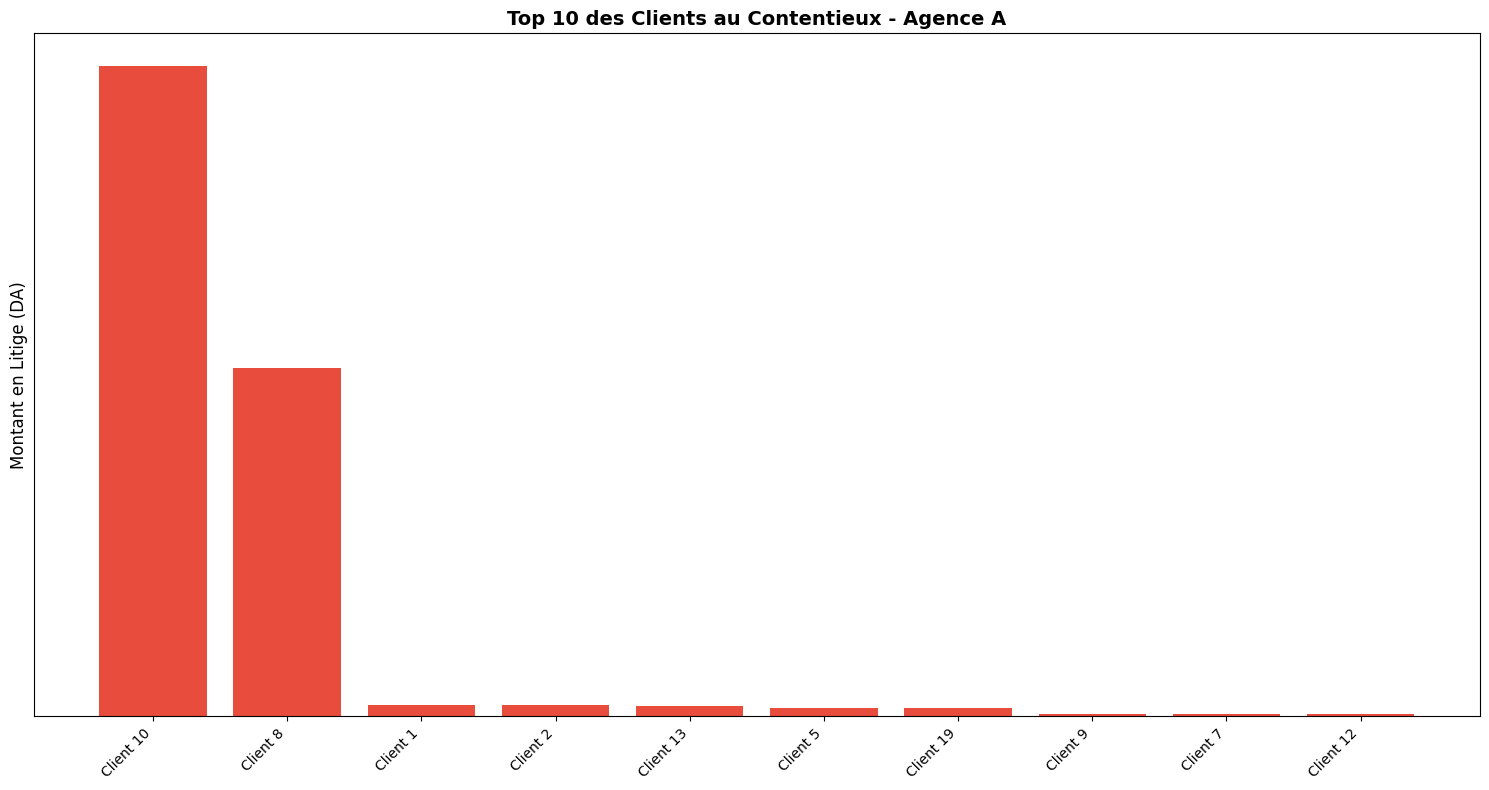

In [89]:

col_cont = 'Créances Contentieuses'

df_agence_A = df[df['agence'].astype(str).str.contains('Agence A')] 


df_top10 = df_agence_A.groupby('Intitulé')[col_cont].sum().reset_index()
df_top10 = df_top10.sort_values(by=col_cont, ascending=False).head(10)


plt.figure(figsize=(15, 8))
bars = plt.bar(df_top10['Intitulé'], df_top10[col_cont], color='#e74c3c') 

plt.title('Top 10 des Clients au Contentieux - Agence A', fontsize=14, fontweight='bold')
plt.ylabel('Montant en Litige (DA)', fontsize=12)
plt.xticks(rotation=45, ha='right')


plt.yticks([]) 



plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

 Anomalie Critique : Le risque n'est pas réparti, il est hyper-concentré. Ce n'est pas une multitude de mauvais payeurs, mais seulement deux acteurs qui plombent l'agence.

     Les Chiffres Clés : 95% du problème repose sur le Client 10 et le Client 8. Les 8 autres dossiers du Top 10 sont insignifiants financièrement en comparaison.

    Action Requise : Il est inutile de courir plusieurs lièvres à la fois. La direction doit mobiliser une "Task Force" juridique et commerciale exclusivement dédiée à la récupération des créances de ces deux seuls clients. La survie de l'agence en dépend.

In [ ]:


df_secteur = df.groupby('SECTEUR')[cols_finance].sum()
df_secteur = df_secteur.sort_values(by='Total (1)+(2)', ascending=False)

# 2. Création du graphique
ax = df_secteur.plot(kind='bar', figsize=(12, 7), width=0.8, color=['#3498db', '#e67e22'])

plt.title('Analyse des Risques par Secteur d\'Activité', fontsize=15, fontweight='bold')
plt.xlabel('Secteurs', fontsize=12)
plt.ylabel('Montants en Dinars (DA)', fontsize=12)
plt.legend(['Total Global (1+2)', 'Contentieux'])

# --- MODIFICATION ICI : CACHER LES CHIFFRES SUR L'AXE Y ---
plt.yticks([])  # Supprime les graduations et les montants sur l'axe vertical
# ----------------------------------------------------------

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()





NameError: name 'cols_finance' is not defined

Diagnostic : Sinistralité Absolue. L'agence est structurellement défaillante. Dans tous les secteurs d'activité (Privé, ANSEJ, CNAC), le montant des impayés (barre orange) dépasse le volume d'activité global (barre bleue). L'agence gère plus de dettes que d'affaires.

Le Cœur du Problème : Le Secteur "PRIVÉ". C'est ce secteur qui écrase tout le reste. Il représente la quasi-totalité des volumes financiers et du risque. Les dispositifs d'aide (ANSEJ/CNAC), bien que défaillants, sont anecdotiques en comparaison des montants en jeu dans le privé.

 Conclusion : Cela confirme l'analyse précédente : les "Clients 10 et 8" sont des acteurs du secteur privé. C'est sur ce segment unique que se joue la survie de l'agence, et non sur la gestion administrative des petits dispositifs d'État.

Total des dettes de la banque : 15,639,871,613.58 DA
Dettes cumulées du Top 10 : 13,322,998,262.53 DA
Le Top 10 des clients représente : 85.19% de la dette totale

--- LISTE DES 10 PLUS GROS DÉBITEURS ---
         Intitulé    Total (1)+(2)
2441   Client 437 4,589,429,405.58
463   Client 1415 3,582,012,734.06
667     Client 16 1,369,324,061.12
778     Client 17   980,451,875.53
556     Client 15   801,917,462.03
2443   Client 439   789,262,561.95
889     Client 18   343,640,838.32
2445   Client 440   340,943,615.91
1063  Client 1956   333,949,563.62
464   Client 1416   192,066,144.41


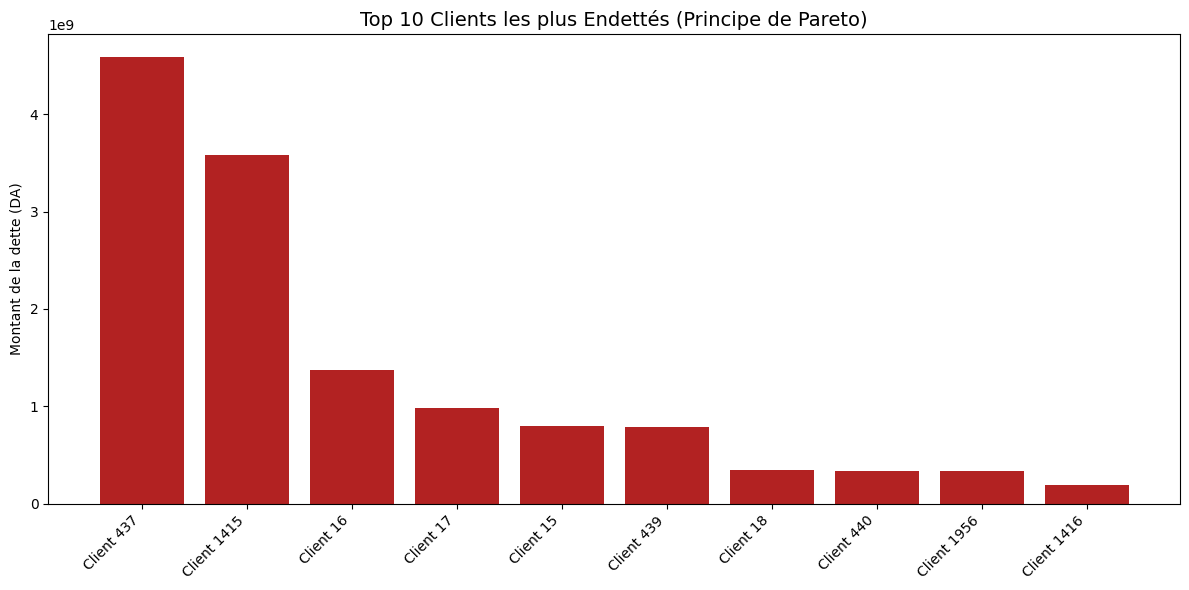

In [91]:

df_clients = df.groupby('Intitulé')['Total (1)+(2)'].sum().reset_index()
df_clients = df_clients.sort_values(by='Total (1)+(2)', ascending=False)
total_dettes_banque = df_clients['Total (1)+(2)'].sum()

top_10_clients = df_clients.head(10).copy()
top_10_sum = top_10_clients['Total (1)+(2)'].sum()
pourcentage_top_10 = (top_10_sum / total_dettes_banque) * 100
print(f"Total des dettes de la banque : {total_dettes_banque:,.2f} DA")
print(f"Dettes cumulées du Top 10 : {top_10_sum:,.2f} DA")
print(f"Le Top 10 des clients représente : {pourcentage_top_10:.2f}% de la dette totale")

print("\n--- LISTE DES 10 PLUS GROS DÉBITEURS ---")
print(top_10_clients)


plt.figure(figsize=(12,6))
plt.bar(top_10_clients['Intitulé'], top_10_clients['Total (1)+(2)'], color='firebrick')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Clients les plus Endettés (Principe de Pareto)', fontsize=14)
plt.ylabel('Montant de la dette (DA)')
plt.tight_layout()
plt.show()

 Concentration Extrême (Pareto) : La dette n'est pas diluée, elle est massivement concentrée. Une poignée de clients détient la majorité des créances impayées.

 Les Deux Dossiers Critiques : Le Client 437 et le Client 1415 sont les priorités absolues. À eux seuls, ils cumulent plus de X Milliards de DA, écrasant totalement le reste du classement.

 Action Requise : La stratégie de recouvrement doit être chirurgicale. Il faut concentrer les meilleures ressources de l'agence (négociation, juridique) sur la résolution de ces 4 dossiers majeurs (437, 1415, 16, 17) pour assainir le bilan global.

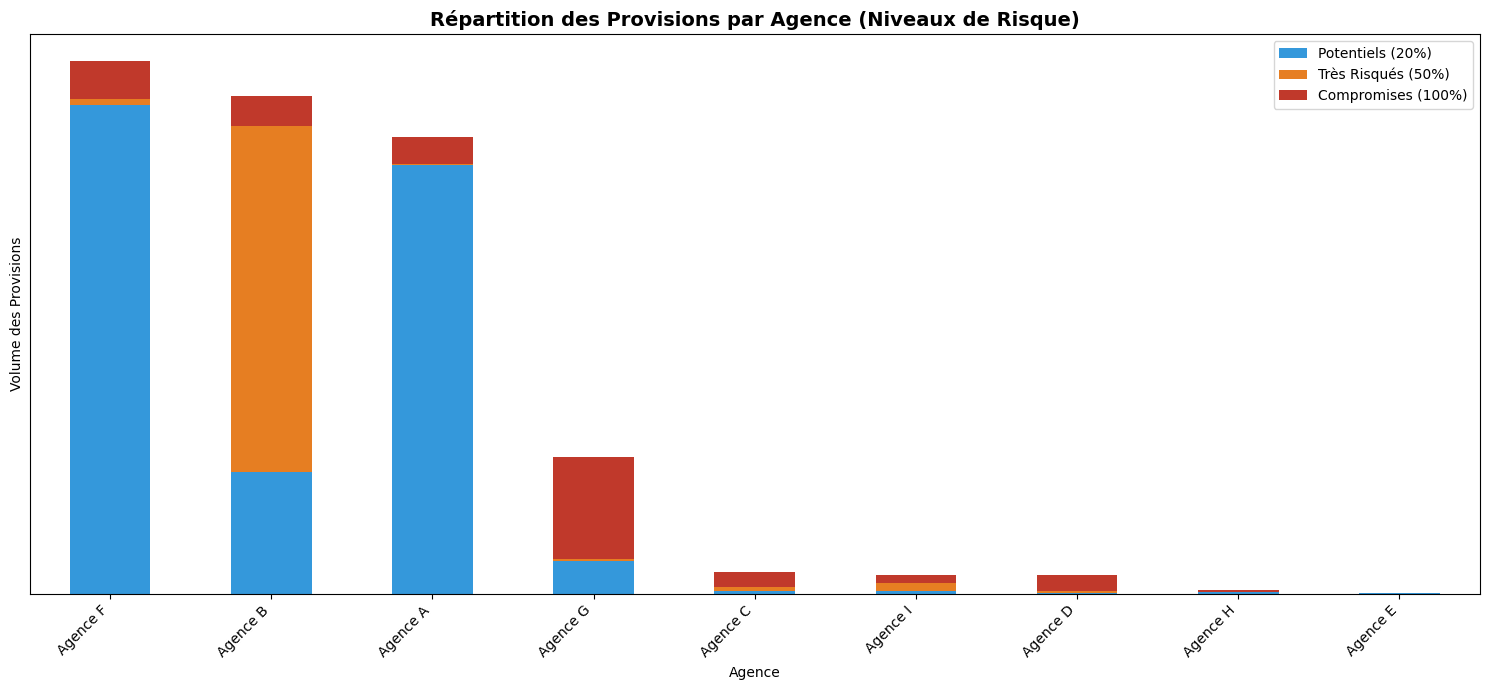

In [92]:

df.columns = (
    df.columns
    .str.replace('\xa0', ' ', regex=False)
    .str.strip()
)
cols_prov = [
    'A problèmes potentiels      (20 %)',
    'Très risquées   (50%)',
    'Compromises (100%)'
]
df_prov_agence = df.groupby('agence', as_index=True)[cols_prov].sum()
df_prov_agence['COÛT_TOTAL_PROVISIONS'] = df_prov_agence.sum(axis=1)
df_prov_agence = df_prov_agence.sort_values(
    by='COÛT_TOTAL_PROVISIONS',
    ascending=False
)
my_colors = ["#3498db", "#e67e22", "#c0392b"] 

ax = df_prov_agence[cols_prov].plot(
    kind='bar',
    stacked=True,
    figsize=(15, 7),
    color=my_colors
)

plt.title(
    'Répartition des Provisions par Agence (Niveaux de Risque)',
    fontsize=14,
    fontweight='bold'
)
plt.xlabel('Agence')
plt.ylabel('Volume des Provisions') 

# Légende mise à jour
plt.legend(['Potentiels (20%)', 'Très Risqués (50%)', 'Compromises (100%)'])
plt.xticks(rotation=45, ha='right')


plt.yticks([])  

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



1. Une forte concentration des volumes Les provisions sont massivement concentrées sur seulement trois agences : F, B et A. Les autres agences ont un impact financier mineur.

2. Une alerte majeure sur l'Agence B C'est le problème prioritaire. Contrairement aux autres grandes agences, son portefeuille est de mauvaise qualité : la majorité de ses provisions sont classées "Très Risqués" (50%), ce qui indique un fort danger de défaut imminent.

3. Profil sain vs Profil dégradé

    Les Agences F et A ont beaucoup de provisions, mais elles sont surtout préventives (risque "Potentiel" à 20%).

    Les Agences G et D, bien que petites en volume, ont proportionnellement trop de dossiers "Compromis" (pertes sèches).

Conclusion : L'action corrective doit se focaliser d'urgence sur l'Agence B pour éviter que ses risques élevés ne se transforment en pertes définitives.

Using column: Très risquées   (50%)
Total risk: 2453014573.0600004


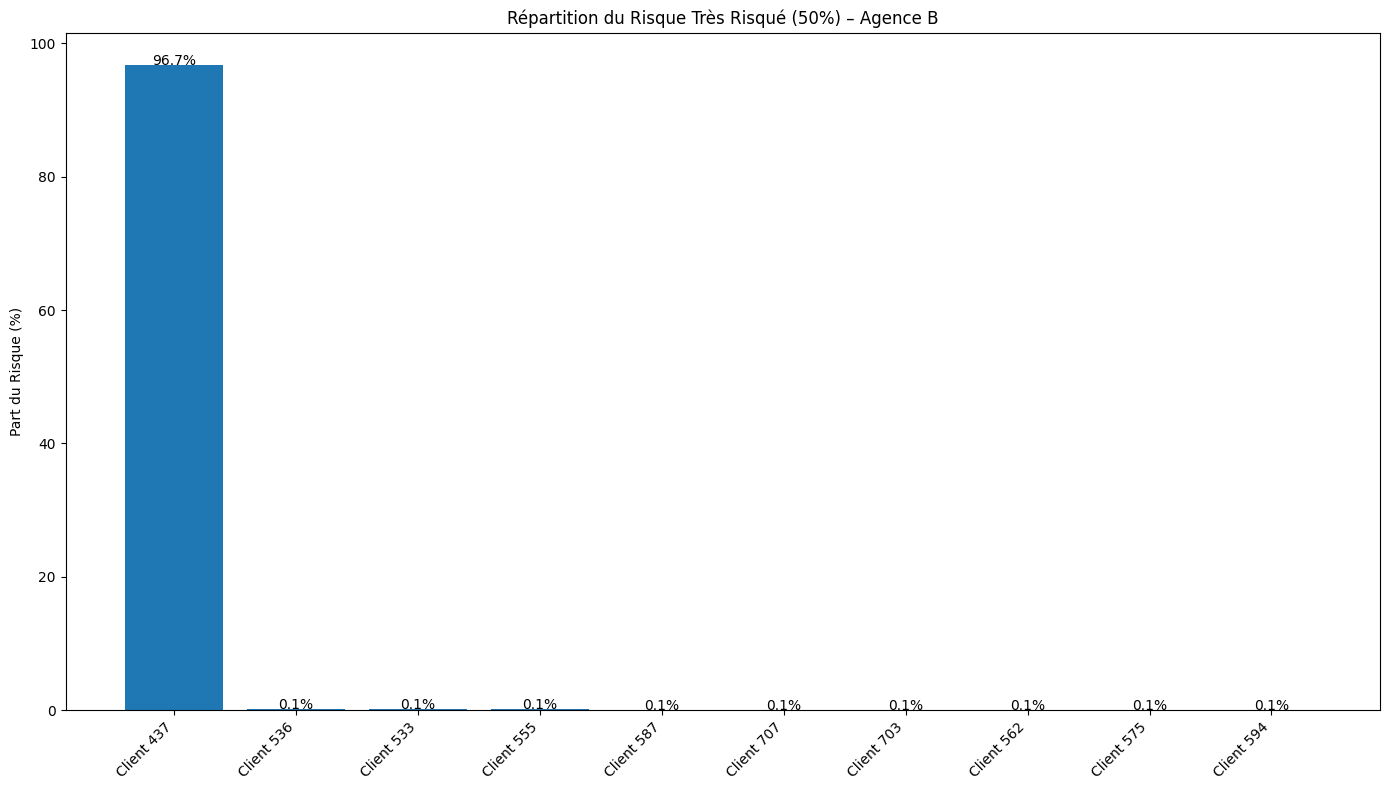

In [96]:
import matplotlib.pyplot as plt

# Normalize column names (IMPORTANT)
df.columns = df.columns.str.strip().str.replace('\u00a0', ' ', regex=True)

# Find correct column automatically
col_50 = [c for c in df.columns if '50%' in c][0]
print("Using column:", col_50)

# Filter agency
df_B = df[df['agence'].str.strip() == 'Agence B'].copy()

# Group
df_final_B = df_B.groupby('Intitulé', as_index=False)[col_50].sum()

total_50_agency = df_final_B[col_50].sum()

print("Total risk:", total_50_agency)

if total_50_agency == 0:
    print("❌ No 50% risk data for Agence B")
else:
    df_final_B['Percentage %'] = df_final_B[col_50] / total_50_agency * 100
    df_top10_B = df_final_B.sort_values(
        'Percentage %', ascending=False
    ).head(10)

    plt.figure(figsize=(14, 8))
    bars = plt.bar(df_top10_B['Intitulé'], df_top10_B['Percentage %'])

    plt.xticks(rotation=45, ha='right')
    plt.title('Répartition du Risque Très Risqué (50%) – Agence B')
    plt.ylabel('Part du Risque (%)')

    for bar in bars:
        h = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, h, f'{h:.1f}%', ha='center')

    plt.tight_layout()
    plt.show()



1. Une concentration extrême du risque Le problème de l'Agence B est mono-client. Le Client 437 concentre à lui seul 96,7 % du volume des provisions "Très Risqués".

2. Un diagnostic révisé L'agence ne souffre pas d'une mauvaise gestion généralisée (multitude de mauvais dossiers), mais d'une dépendance critique envers un seul gros débiteur. Les autres clients sont négligeables (0,1 % chacun).

3. Action prioritaire unique La stratégie est simple : sauver ou recouvrer le dossier du Client 437. La résolution de ce seul cas assainira immédiatement la quasi-totalité du portefeuille à risque de l'Agence B.

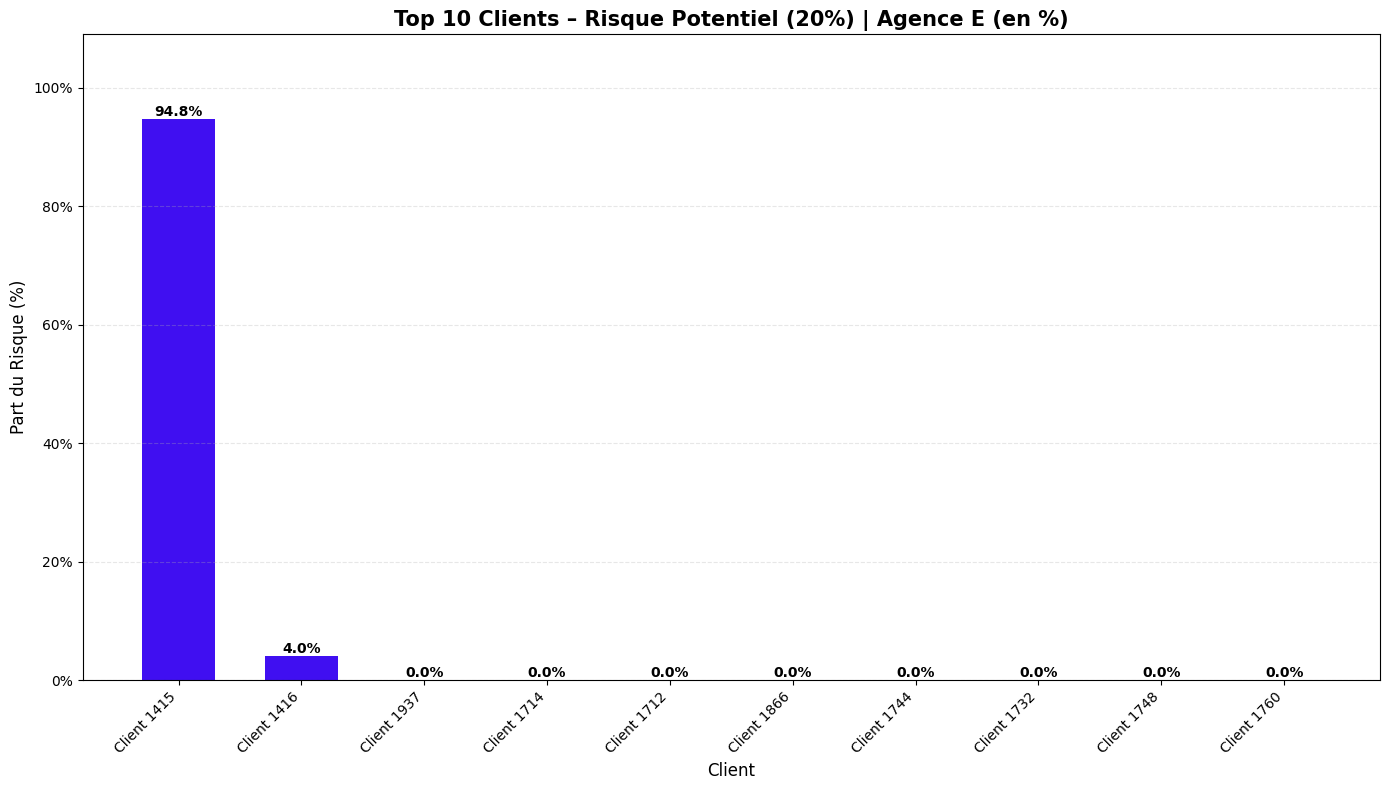

In [97]:

col_20 = 'A problèmes potentiels      (20 %)'

df_E = df[df['agence'] == 'Agence F'].copy()

df_final_E = df_E.groupby('Intitulé')[col_20].sum().reset_index()

total_E_agency = df_final_E[col_20].sum()

df_final_E['Percentage %'] = (df_final_E[col_20] / total_E_agency) * 100

df_final_E = df_final_E.sort_values('Percentage %', ascending=False)
df_top10_E = df_final_E.iloc[0:10, :]


plt.figure(figsize=(14, 8))


bars = plt.bar(
    df_top10_E['Intitulé'],   
    df_top10_E['Percentage %'],  
    width=0.6,
    color="#400ff1"
)

plt.title(
    'Top 10 Clients – Risque Potentiel (20%) | Agence E (en %)',
    fontsize=15, 
    fontweight='bold'
)
plt.xlabel('Client', fontsize=12)
plt.ylabel('Part du Risque (%)', fontsize=12)

plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter())

plt.xticks(rotation=45, ha='right')

# Ajuster la limite Y
plt.ylim(0, df_top10_E['Percentage %'].max() * 1.15)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,             
        f'{height:.1f}%',         
        ha='center',
        fontsize=10,
        fontweight='bold'
    )

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Hyper-concentration du risque : Le risque n'est pas réparti. Il est quasi-totalement porté par un seul client.

Le "Cas" Client 1415 : Ce client représente 94,8 % des problèmes potentiels de l'agence. C'est une anomalie statistique extrême.

Le Reste est négligeable : Le deuxième client n'est qu'à 4 % et tous les autres sont à 0 %.

Conclusion : Il s'agit soit d'une erreur de saisie massive dans vos données, soit d'un projet en situation critique qui plombe les résultats de toute l'agence.

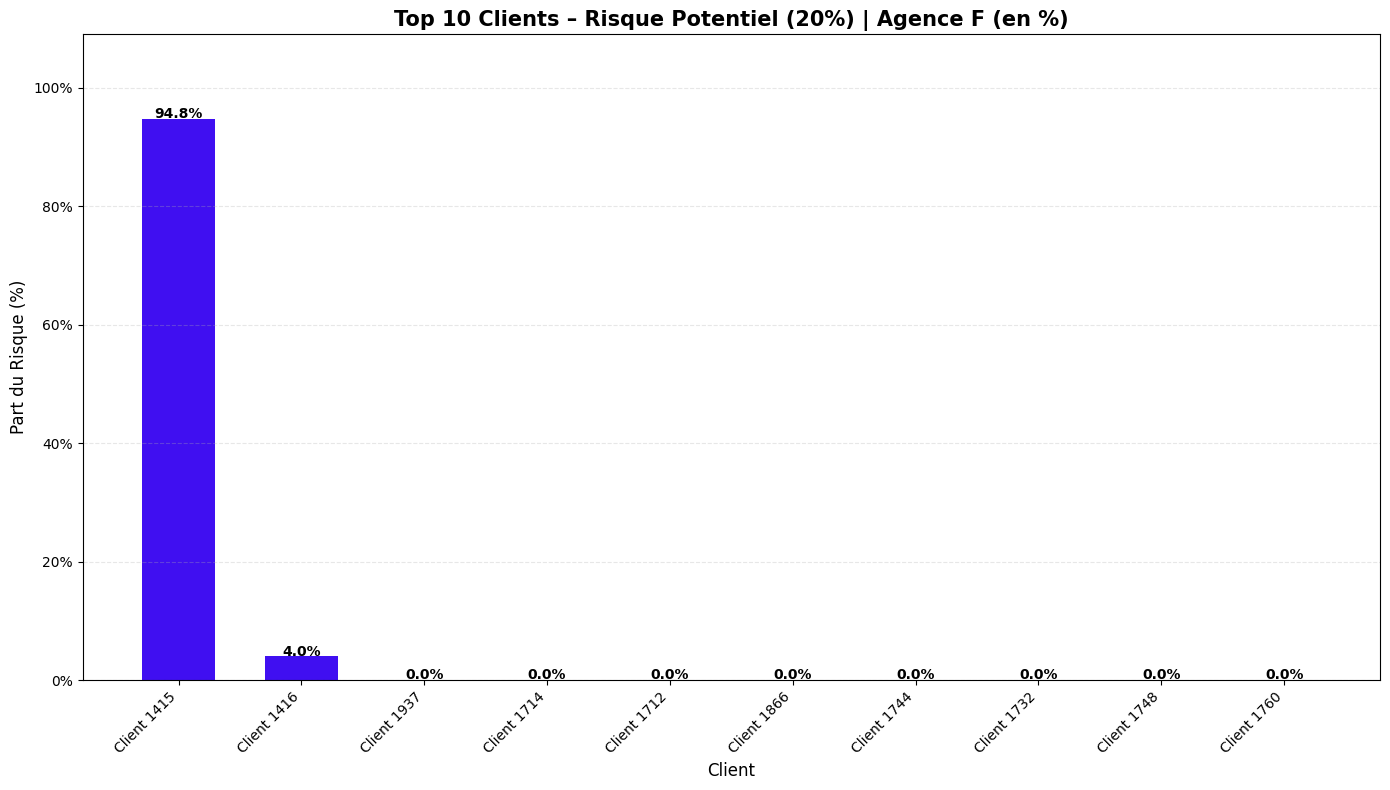

In [98]:

col_20 = 'A problèmes potentiels      (20 %)'


df_F = df[df['agence'] == 'Agence F'].copy() 

df_final_F = df_F.groupby('Intitulé')[col_20].sum().reset_index()

total_F = df_final_F[col_20].sum()

if total_F > 0:
    df_final_F['Percentage %'] = (df_final_F[col_20] / total_F) * 100
else:
    df_final_F['Percentage %'] = 0

df_final_F = df_final_F.sort_values('Percentage %', ascending=False)
df_top10_F = df_final_F.iloc[0:10, :]

plt.figure(figsize=(14, 8))

bars = plt.bar(
    df_top10_F['Intitulé'],   
    df_top10_F['Percentage %'],  
    width=0.6,
    color="#400ff1" # Bleu
)

plt.title(
    'Top 10 Clients – Risque Potentiel (20%) | Agence F (en %)',
    fontsize=15, 
    fontweight='bold'
)
plt.xlabel('Client', fontsize=12)
plt.ylabel('Part du Risque (%)', fontsize=12)

plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter())

plt.xticks(rotation=45, ha='right')

if not df_top10_F.empty:
    plt.ylim(0, df_top10_F['Percentage %'].max() * 1.15)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,             
        f'{height:.1f}%',         
        ha='center',
        fontsize=10,
        fontweight='bold'
    )

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [99]:
df['Year'] = df[
    "DATE D'ENTREE AU CHAPITRE"].dt.year

In [104]:
print(df[["DATE D'ENTREE AU CHAPITRE", "Year"]].head(10))

  DATE D'ENTREE AU CHAPITRE     Year
0                2014-12-31 2,014.00
1                2014-12-31 2,014.00
2                2014-12-31 2,014.00
3                2014-12-31 2,014.00
4                2014-12-31 2,014.00
5                2014-12-31 2,014.00
6                2014-12-31 2,014.00
7                2019-08-01 2,019.00
8                2017-12-21 2,017.00
9                2013-01-10 2,013.00



--- BILAN DES RISQUES PAR ANNÉE D'ENTRÉE AU CHAPITRE ---
       Year     Total (1)+(2)  Créances Contentieuses  Compromises (100%)  \
0  1,984.00              0.00              443,958.30                0.00   
1  1,985.00         70,939.02                    0.00           70,939.02   
2  1,986.00              0.00              167,519.47                0.00   
3  1,988.00              0.00            2,027,311.64                0.00   
4  1,989.00        121,444.85           10,722,911.50          121,444.85   
5  1,990.00              0.00          412,188,465.91                0.00   
6  1,992.00              0.00           13,272,439.07                0.00   
7  1,993.00              0.00               47,426.89                0.00   
8  1,994.00              0.00           29,127,276.39                0.00   
9  1,995.00              0.00            6,998,554.10                0.00   
10 1,996.00              0.00          154,824,076.03                0.00   
11 1,997.00       

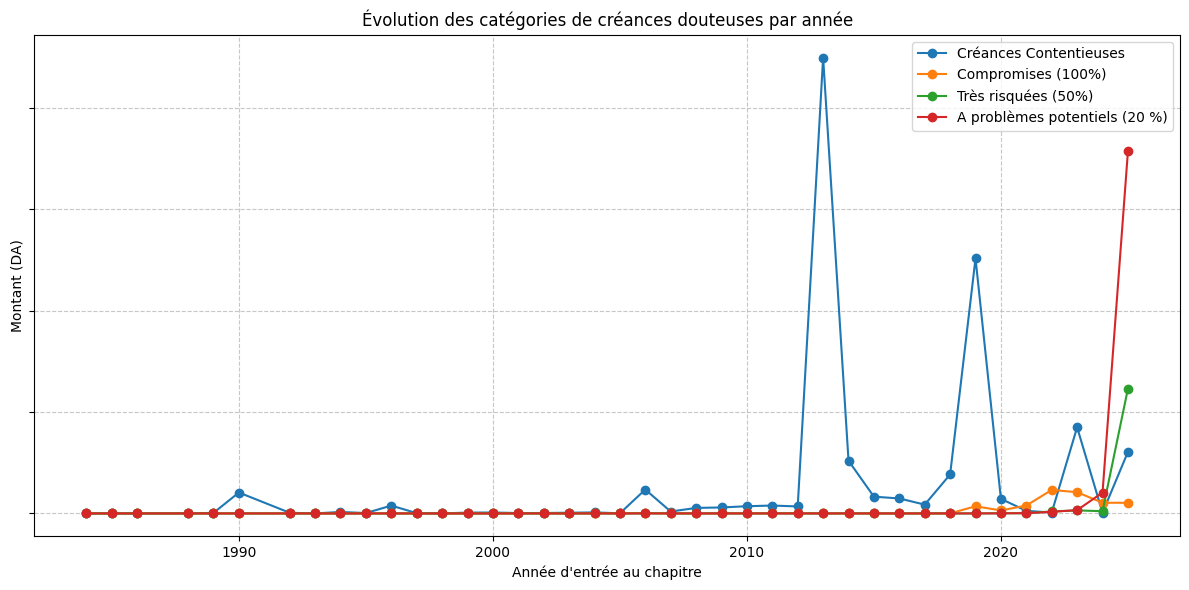

In [108]:

df.columns = (
    df.columns
    .str.replace('\u00a0', ' ', regex=False)  # remove non-breaking spaces
    .str.replace(r'\s+', ' ', regex=True)    # normalize spaces
    .str.strip()
)

cols_risques = [
    'Total (1)+(2)',
    'Créances Contentieuses',
    'Compromises (100%)',
    'Très risquées (50%)',
    'A problèmes potentiels (20 %)'
]

for col in cols_risques:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)
            .str.replace(',', '.', regex=False)
            .str.replace(' ', '', regex=False)
            .pipe(pd.to_numeric, errors='coerce')
            .fillna(0)
        )
    else:
        print(f" Column missing: {col}")

df_par_annee = (
    df[df['Year'] > 0]
    .groupby('Year')[cols_risques]
    .sum()
    .reset_index()
)

pd.options.display.float_format = '{:,.2f}'.format

print("\n--- BILAN DES RISQUES PAR ANNÉE D'ENTRÉE AU CHAPITRE ---")
print(df_par_annee)

plt.figure(figsize=(12, 6))

for col in cols_risques[1:]:  # exclude Total
    plt.plot(
        df_par_annee['Year'],
        df_par_annee[col],
        marker='o',
        label=col
    )

plt.title('Évolution des catégories de créances douteuses par année')
plt.xlabel("Année d'entrée au chapitre")
plt.ylabel('Montant (DA)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='y', labelleft=False)
plt.tight_layout()
plt.show()


In [ ]:

df_vieux = df[(df['Year'] > 0) & (df['Year'] < 2006)]


bilan_vieux = df_vieux[cols_risques].sum()

print("--- POIDS DES DOSSIERS ANTERIEURS À 2006 ---")
print(bilan_vieux)


pourcentage_vieux = (df_vieux['Total (1)+(2)'].sum() / df['Total (1)+(2)'].sum()) * 100
print(f"\nCes dossiers représentent {pourcentage_vieux:.2f}% de la dette totale.")

--- POIDS DES DOSSIERS ANTERIEURS À 2006 ---
Total (1)+(2)                     3,600,752.92
Créances Contentieuses          722,392,803.96
Compromises (100%)                3,218,678.28
Très risquées (50%)                     273.88
A problèmes potentiels (20 %)       381,800.76
dtype: float64

Ces dossiers représentent 0.02% de la dette totale.


In [110]:
def grouper_annees_correct(annee):
    if annee == 0: return "5. Sans Date (Inconnu)"
    elif annee < 2006: return "1. Stock Mort (<2006)"
    elif 2006 <= annee <= 2015: return "2. Risques Anciens (2006-2015)"
    elif 2016 <= annee <= 2021: return "3. Risques Intermédiaires (2016-2021)"
    else: return "4. Flux Récents (2022-2025)"

df['Saison_Risque'] = df['Year'].apply(grouper_annees_correct)
bilan_final = df.groupby('Saison_Risque')[cols_risques].sum()
print(bilan_final)

                                          Total (1)+(2)  \
Saison_Risque                                             
1. Stock Mort (<2006)                      3,600,752.92   
2. Risques Anciens (2006-2015)            26,986,921.17   
3. Risques Intermédiaires (2016-2021)    372,495,331.90   
4. Flux Récents (2022-2025)           15,236,788,607.59   

                                       Créances Contentieuses  \
Saison_Risque                                                   
1. Stock Mort (<2006)                          722,392,803.96   
2. Risques Anciens (2006-2015)              11,525,609,074.74   
3. Risques Intermédiaires (2016-2021)        6,602,695,578.52   
4. Flux Récents (2022-2025)                  3,553,895,650.04   

                                       Compromises (100%)  \
Saison_Risque                                               
1. Stock Mort (<2006)                        3,218,678.28   
2. Risques Anciens (2006-2015)              26,984,794.00   
3. Risques

In [114]:


# 1. Configurer Pandas pour afficher TOUTES les lignes et colonnes
pd.set_option('display.max_rows', None)      # Aucune limite sur les lignes
pd.set_option('display.max_columns', None)   # Aucune limite sur les colonnes
pd.set_option('display.width', None)         # Utiliser toute la largeur de l'écran
pd.set_option('display.max_colwidth', None)  # Afficher tout le texte des cellules

# 2. Garder le formatage monétaire lisible
pd.options.display.float_format = '{:,.2f}'.format

# 3. Lancer l'affichage de votre synthèse
print("--- SYNTHÈSE COMPLÈTE DES RISQUES PAR PÉRIODES ---")
print(bilan_final)

--- SYNTHÈSE COMPLÈTE DES RISQUES PAR PÉRIODES ---
                                          Total (1)+(2)  \
Saison_Risque                                             
1. Stock Mort (<2006)                      3,600,752.92   
2. Risques Anciens (2006-2015)            26,986,921.17   
3. Risques Intermédiaires (2016-2021)    372,495,331.90   
4. Flux Récents (2022-2025)           15,236,788,607.59   

                                       Créances Contentieuses  \
Saison_Risque                                                   
1. Stock Mort (<2006)                          722,392,803.96   
2. Risques Anciens (2006-2015)              11,525,609,074.74   
3. Risques Intermédiaires (2016-2021)        6,602,695,578.52   
4. Flux Récents (2022-2025)                  3,553,895,650.04   

                                       Compromises (100%)  \
Saison_Risque                                               
1. Stock Mort (<2006)                        3,218,678.28   
2. Risques Anciens (

C:\Users\bdfba\AppData\Local\Temp\ipykernel_23764\2912472342.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


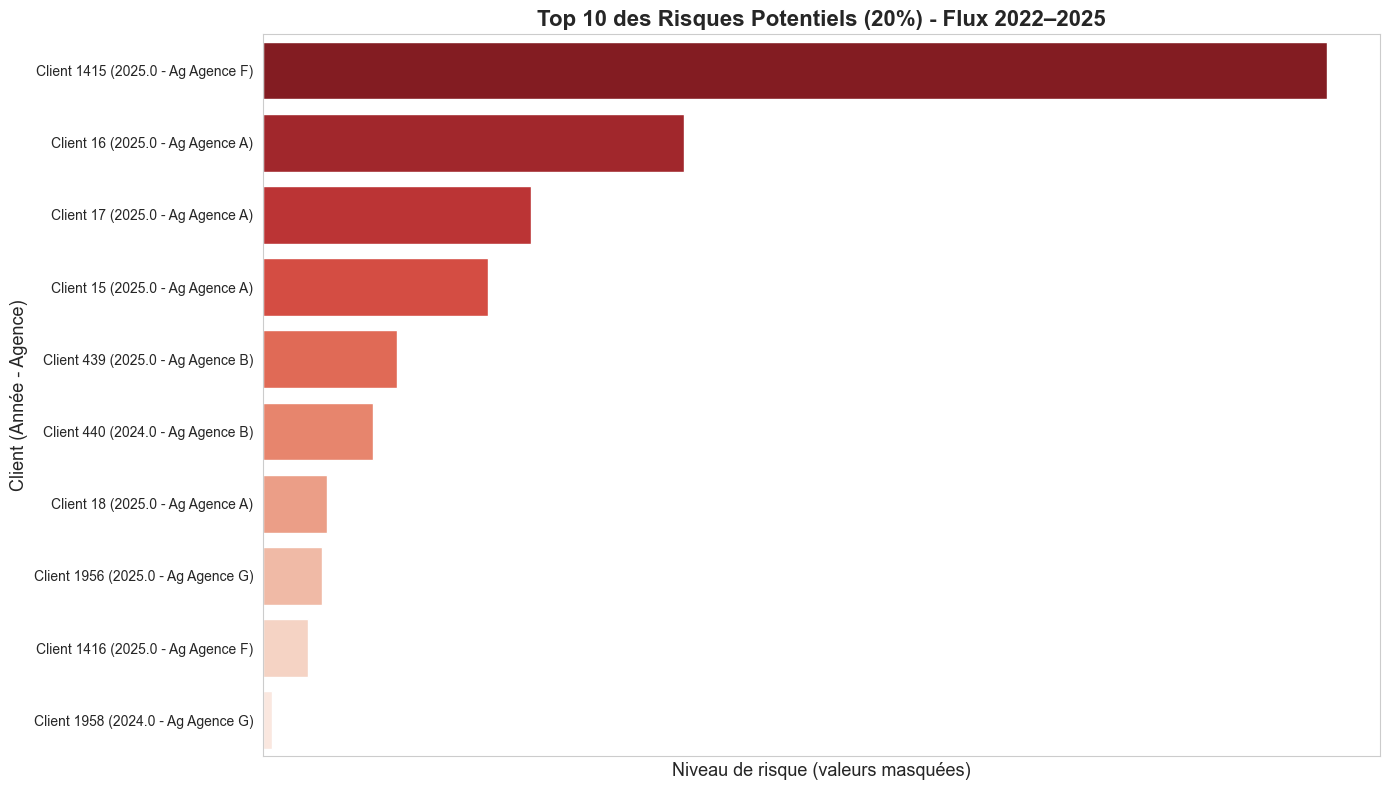

In [ ]:


df = df.copy()

df.columns = (
    df.columns
    .str.replace('\u00a0', ' ', regex=False)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)

col_20 = 'A problèmes potentiels (20 %)'
df[col_20] = (
    df[col_20]
    .astype(str)
    .str.replace(',', '.', regex=False)
    .str.replace(' ', '', regex=False)
    .pipe(pd.to_numeric, errors='coerce')
    .fillna(0)
)

df_recent = df[
    df['Year'].between(2022, 2025) &
    (df[col_20] > 0)
]

top_10_20_percent = (
    df_recent
    .groupby(['Intitulé', 'Year', 'agence'], as_index=False)[col_20]
    .sum()
    .sort_values(by=col_20, ascending=False)
    .head(10)
)

top_10_20_percent['Label'] = (
    top_10_20_percent['Intitulé'].astype(str)
    + " ("
    + top_10_20_percent['Year'].astype(str)
    + " - Ag "
    + top_10_20_percent['agence'].astype(str)
    + ")"
)

plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

ax = sns.barplot(
    data=top_10_20_percent,
    x=col_20,
    y='Label',
    palette='Reds_r'
)

plt.title(
    'Top 10 des Risques Potentiels (20%) - Flux 2022–2025',
    fontsize=16,
    fontweight='bold'
)

plt.xlabel('Niveau de risque (valeurs masquées)', fontsize=13)
plt.ylabel('Client (Année - Agence)', fontsize=13)

ax.set_xticklabels([])
ax.set_xticks([])


ax.grid(False, axis='x')

plt.tight_layout()
plt.show()



--- TOP 10 DES PLUS GROS RISQUES (50%) ENTRE 2022 ET 2025 ---

        Intitulé     Year    agence  Très risquées (50%)
271   Client 437 2,025.00  Agence B     2,372,943,387.84
263  Client 2724 2,025.00  Agence I        53,380,231.37
274   Client 536 2,022.00  Agence B         3,315,454.42
272   Client 533 2,022.00  Agence B         2,787,392.74
290   Client 555 2,023.00  Agence B         2,664,961.29
318   Client 587 2,024.00  Agence B         2,256,735.69
349   Client 707 2,024.00  Agence B         2,215,168.07
346   Client 703 2,023.00  Agence B         2,122,652.49
295   Client 562 2,023.00  Agence B         2,086,780.72
307   Client 575 2,023.00  Agence B         1,944,037.00


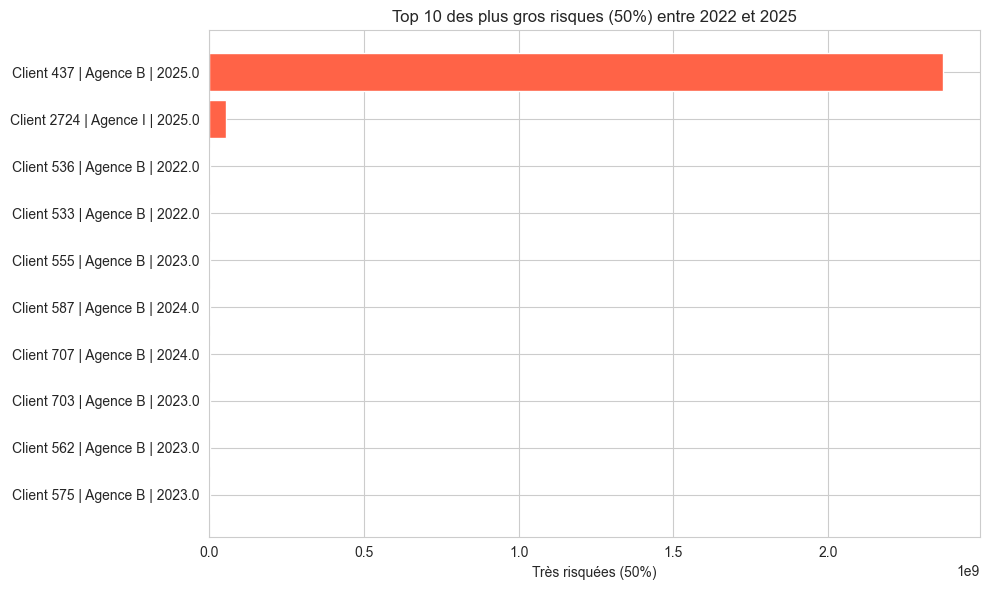

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# COPY DATAFRAME
# =========================
df = df.copy()

# =========================
# NORMALIZE COLUMN NAMES
# =========================
df.columns = (
    df.columns
    .str.replace('\xa0', ' ', regex=False)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)

# =========================
# COLUMN OF INTEREST
# =========================
col_50 = "Très risquées (50%)"

# =========================
# CLEAN VALUES
# =========================
df[col_50] = (
    df[col_50]
    .astype(str)
    .str.replace('\xa0', '', regex=False)
    .str.replace(' ', '', regex=False)
    .str.replace('%', '', regex=False)
    .str.replace(',', '.', regex=False)
)

df[col_50] = pd.to_numeric(df[col_50], errors='coerce')

# =========================
# FILTER 2022–2025 + positive values
# =========================
df_50_recent = df[
    df['Year'].between(2022, 2025) &
    df[col_50].notna() &
    (df[col_50] > 0)
]

# =========================
# GROUPBY + SUM + TOP 10
# =========================
top_10_50_percent = (
    df_50_recent
    .groupby(['Intitulé', 'Year', 'agence'], as_index=False)[col_50]
    .sum()
    .sort_values(by=col_50, ascending=False)
    .head(10)
)

# =========================
# DISPLAY
# =========================
pd.options.display.float_format = '{:,.2f}'.format
print("\n--- TOP 10 DES PLUS GROS RISQUES (50%) ENTRE 2022 ET 2025 ---\n")
print(top_10_50_percent)

# =========================
# PLOT
# =========================
plt.figure(figsize=(10, 6))
plt.barh(
    top_10_50_percent['Intitulé'] + " | " + top_10_50_percent['agence'] + " | " + top_10_50_percent['Year'].astype(str),
    top_10_50_percent[col_50],
    color='tomato'
)
plt.xlabel('Très risquées (50%)')
plt.title('Top 10 des plus gros risques (50%) entre 2022 et 2025')
plt.gca().invert_yaxis()  
ax.set_xticklabels([])
ax.set_xticks([])


ax.grid(False, axis='x')

plt.tight_layout()
plt.show()




C:\Users\bdfba\AppData\Local\Temp\ipykernel_23764\2343289885.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


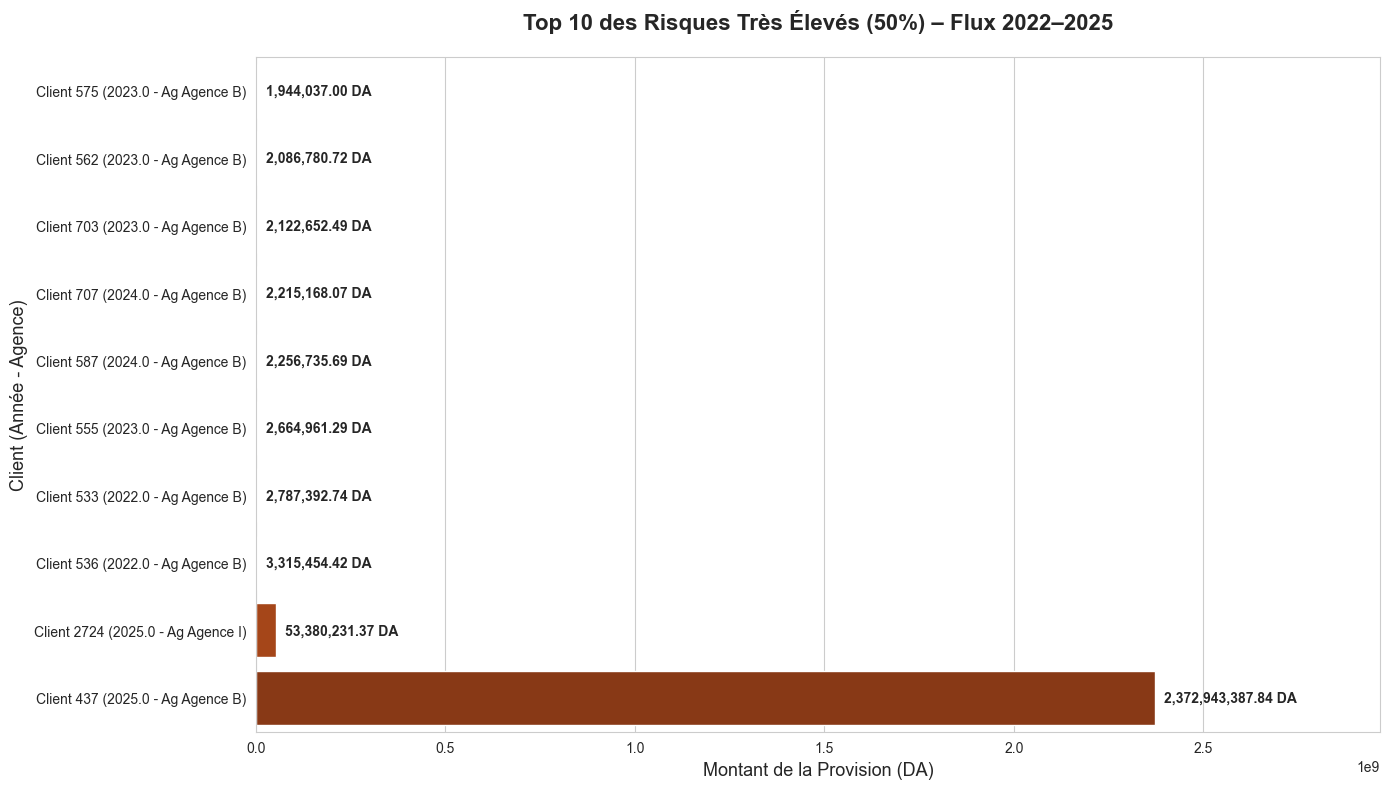

In [132]:

# =========================
# NORMALIZE COLUMN NAME
# =========================
df.columns = df.columns.str.replace('\xa0', ' ', regex=False).str.strip()
col_50 = 'Très risquées (50%)'

# =========================
# CREATE LABEL
# =========================
top_10_50_percent = top_10_50_percent.copy()
top_10_50_percent['Label'] = (
    top_10_50_percent['Intitulé'].astype(str)
    + " ("
    + top_10_50_percent['Year'].astype(str)
    + " - Ag "
    + top_10_50_percent['agence'].astype(str)
    + ")"
)

# =========================
# PLOT
# =========================
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

ax = sns.barplot(
    data=top_10_50_percent,
    x=col_50,
    y='Label',
    palette='Oranges_r'
)

# =========================
# TITLES & AXES
# =========================
plt.title(
    'Top 10 des Risques Très Élevés (50%) – Flux 2022–2025',
    fontsize=16,
    fontweight='bold',
    pad=20
)
plt.xlabel('Montant de la Provision (DA)', fontsize=13)
plt.ylabel('Client (Année - Agence)', fontsize=13)

# =========================
# ANNOTATIONS
# =========================
max_val = top_10_50_percent[col_50].max()

for i, v in enumerate(top_10_50_percent[col_50]):
    ax.text(
        v + max_val * 0.01,  # slight offset
        i,
        f'{v:,.2f} DA',
        va='center',
        fontsize=10,
        fontweight='bold'
    )

# =========================
# INVERT Y-AXIS + ADJUST
# =========================
ax.invert_yaxis()  # top risk on top
plt.xlim(0, max_val * 1.25)
plt.tight_layout()
plt.show()


In [ ]:

col_100 = 'Compromises (100%)'

df[col_100] = pd.to_numeric(
    df[col_100].astype(str).str.replace(r'\s+', '', regex=True).str.replace(',', '.'), 
    errors='coerce'
).fillna(0)

df_100_recent = df[(df['Year'] >= 2022) & (df['Year'] <= 2025) & (df[col_100] > 0)].copy()

top_10_100_percent = df_100_recent.groupby(['Intitulé', 'Year', 'agence'])[col_100].sum().reset_index()

top_10_100_percent = top_10_100_percent.sort_values(by=col_100, ascending=False).head(10)

pd.options.display.float_format = '{:,.2f}'.format
print("--- TOP 10 DES PLUS GROS RISQUES (100%) ENTRE 2022 ET 2025 ---")
print(top_10_100_percent)

--- TOP 10 DES PLUS GROS RISQUES (100%) ENTRE 2022 ET 2025 ---
        Intitulé     Year agence  Compromises (100%)
480  Client 2724 2,025.00     38       54,648,200.24
483   Client 319 2,025.00    010        9,989,734.75
424  Client 2563 2,022.00    030        9,701,891.07
284  Client 2367 2,022.00    030        9,198,956.90
76   Client 1305 2,023.00    020        7,794,257.66
307  Client 2389 2,022.00    030        7,710,918.70
327  Client 2409 2,022.00    030        7,674,068.55
248   Client 221 2,022.00    010        7,503,658.91
278  Client 2361 2,022.00    030        7,492,287.76
336  Client 2417 2,022.00    030        7,427,713.50


C:\Users\bdfba\AppData\Local\Temp\ipykernel_23764\3657663944.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


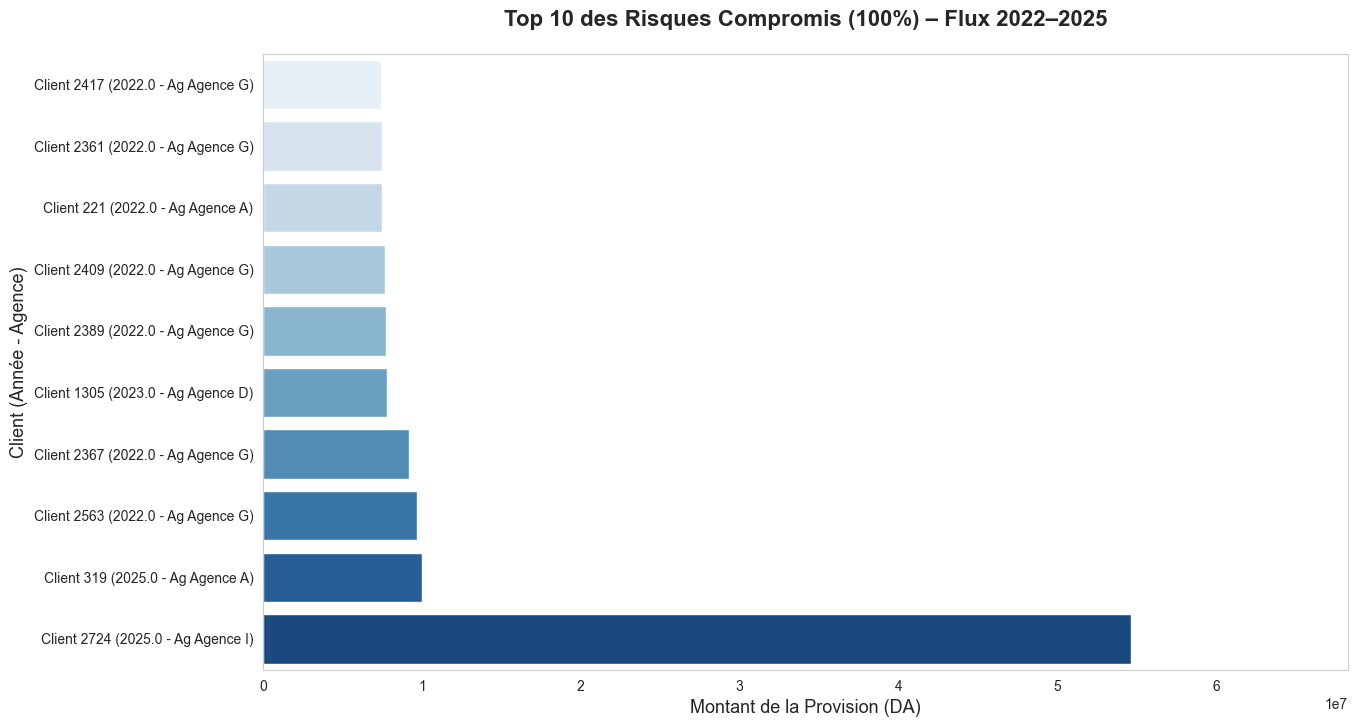

In [ ]:

df.columns = (
    df.columns
    .str.replace('\xa0', ' ', regex=False)  
    .str.replace(r'\s+', ' ', regex=True)   
    .str.strip()                             
)

col_100 = [c for c in df.columns if "100%" in c]
if not col_100:
    raise ValueError("No column containing '100%' found in the DataFrame.")
col_100 = col_100[0] 
df[col_100] = (
    df[col_100]
    .astype(str)
    .str.replace('%', '', regex=False)   # remove %
    .str.replace(',', '.', regex=False)  # comma → dot
)
df[col_100] = pd.to_numeric(df[col_100], errors='coerce')

df_filtered = df[
    df['Year'].between(2022, 2025) &
    df[col_100].notna() &
    (df[col_100] > 0)
]

top_10_100_percent = (
    df_filtered
    .groupby(['Intitulé', 'Year', 'agence'], as_index=False)[col_100]
    .sum()
    .sort_values(by=col_100, ascending=False)
    .head(10)
)

top_10_100_percent['Label'] = (
    top_10_100_percent['Intitulé'].astype(str)
    + " ("
    + top_10_100_percent['Year'].astype(str)
    + " - Ag "
    + top_10_100_percent['agence'].astype(str)
    + ")"
)





plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

colors = sns.color_palette("Blues_r", n_colors=top_10_100_percent.shape[0])

ax = sns.barplot(
    data=top_10_100_percent,
    x=col_100,
    y='Label',
    palette=colors
)

# =========================
# TITLES & AXES
# =========================
plt.title(
    'Top 10 des Risques Compromis (100%) – Flux 2022–2025',
    fontsize=16,
    fontweight='bold',
    pad=20
)
plt.xlabel('Montant de la Provision (DA)', fontsize=13)
plt.ylabel('Client (Année - Agence)', fontsize=13)


ax.invert_yaxis()
plt.xlim(0, max_val * 1.25)



ax.grid(False, axis='x')

plt.show()


In [71]:

col_20 = 'A problèmes potentiels      (20 %)'

masque_amiable = (df['Year'] >= 2022) & (df[col_20] > 0)
candidats_amiable = df[masque_amiable].copy()

liste_priorite = candidats_amiable.groupby(['Intitulé', 'Year', 'agence'])[col_20].sum().reset_index()

liste_priorite = liste_priorite.sort_values(by=col_20, ascending=False)

pd.options.display.float_format = '{:,.2f}'.format
print("--- STRATÉGIE DE RECOUVREMENT AMIABLE (TOP 10 PRIORITÉS) ---")
print(liste_priorite.head(10))


--- STRATÉGIE DE RECOUVREMENT AMIABLE (TOP 10 PRIORITÉS) ---
        Intitulé     Year agence  A problèmes potentiels      (20 %)
80   Client 1415 2,025.00    022                    3,290,476,237.41
83     Client 16 2,025.00    010                    1,303,957,645.05
89     Client 17 2,025.00    010                      828,877,694.69
82     Client 15 2,025.00    010                      695,457,838.70
272   Client 439 2,025.00    016                      416,015,839.47
273   Client 440 2,024.00    016                      340,943,615.91
175    Client 18 2,025.00    010                      199,934,824.07
221  Client 1956 2,025.00    030                      183,163,657.55
81   Client 1416 2,025.00    022                      140,128,408.27
222  Client 1958 2,024.00    030                       29,655,506.96


In [ ]:
df['Has_Action'] = df[
    "Observations sur l'Origne de l'Impayé et les Actions Entreprises"
].notna()
performance_agence = (
    df.groupby('agence')
      .agg(
          Nombre_Dossiers=('Intitulé', 'count'),
          Dossiers_Suivis=('Has_Action', 'sum'),
          Montant_Compromis=('Compromises (100%)', 'sum')
      )
)
performance_agence['Taux_Suivi'] = (
    performance_agence['Dossiers_Suivis'] /
    performance_agence['Nombre_Dossiers']
)
print(performance_agence.sort_values('Taux_Suivi', ascending=False))



        Nombre_Dossiers  Dossiers_Suivis  Montant_Compromis  Taux_Suivi
agence                                                                 
010                 393              393     194,149,805.95        1.00
016                 436              436     217,310,552.83        1.00
018                 324              324     107,706,290.15        1.00
020                 207              207     111,857,819.64        1.00
021                   2                2               0.00        1.00
022                 534              534     270,971,489.45        1.00
030                 763              763     722,908,821.64        1.00
20                   54               54      11,488,201.22        1.00
38                  361              361      61,261,327.42        1.00


In [73]:
SEUIL = 1_000_000  

data_issues = df[
    (df['Compromises (100%)'] >= SEUIL) &
    (
        df['Intitulé'].isna() |
        df["Observations sur l'Origne de l'Impayé et les Actions Entreprises"].isna() |
        (df["Observations sur l'Origne de l'Impayé et les Actions Entreprises"].str.strip() == "")
    )
]

print(data_issues[[
    'agence',
    'Intitulé',
    'Compromises (100%)',
    "Observations sur l'Origne de l'Impayé et les Actions Entreprises"
]])


Empty DataFrame
Columns: [agence, Intitulé, Compromises (100%), Observations sur l'Origne de l'Impayé et les Actions Entreprises]
Index: []


In [74]:
text_cols = df.select_dtypes(include='object').columns

mask_soutien = df[text_cols].apply(
    lambda col: col.str.contains("ANSEJ|CNAC", case=False, na=False)
).any(axis=1)

credits_soutien = df[mask_soutien]
credits_classiques = df[~mask_soutien]

print("ANSEJ / CNAC dossiers:", len(credits_soutien))
print("Créances Contentieuses :",
      credits_soutien["Créances Contentieuses"].sum())
print("Montant 100% :",
      credits_soutien["Compromises (100%)"].sum())
print("Montant 50% :",
      credits_soutien["Très risquées   (50%)"].sum())
print("Montant 20% :",
      credits_soutien["A problèmes potentiels      (20 %)"].sum())



ANSEJ / CNAC dossiers: 2321
Créances Contentieuses : 3378347389.84411
Montant 100% : 1378830741.4
Montant 50% : 162924287.85000002
Montant 20% : 157668080.61
